In [3]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


In [25]:
class Analysis():
    def __init__(self):
        np.random.seed(12341324)
        
        #데이터 셋 생성
    def create_dataset(self, num = 5000):
        if num % 2 == 1:
            return None
        data_len = int(num / 2)
        return np.random.random(num).reshape(data_len , 2)
        
        # 데이터 플로팅
    def plot_data(self, data):
        if len(data.shape) != 2 :
            print('데이터를 확인해주세요.')
            return
        plt.figure(figsize=(7, 7))
        plt.plot(data[:, 0], data[:, 1], 'b.')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.show()
        
        # 데이터 분류
    def classify_data(self, data):
        target = []
        for i in range(len(data)):
            if data[i, 0] < 0.5 and data[i, 1] < 0.5:
                target.append('type0')
            elif data[i, 0] >= 0.5 and data[i, 1] < 0.5:
                target.append('type1')
            elif data[i, 0] < 0.5 and data[i, 1] >= 0.5:
                target.append('type2')
            elif data[i, 0] >= 0.5 and data[i, 1] >= 0.5:
                target.append('type3')
        return np.array(target)
    
        # 데이터 인코딩
    def encode_data(self, target):
        encoder = LabelBinarizer()
        target = encoder.fit_transform(target)
        return target
        
        # percent를 이용한 train test 데이터 구분
    def get_train_And_test(self, data, percent = 80):
        if percent > 100 :
            print('파라미터를 확인해주세요')
            return 
        criteria = int((len(data) * percent) / 100)
        print('기준 ', criteria)
        return (data[0 : criteria], data[criteria : ])
    
        # 모델 생성
    def create_model(self, x_train, t_train, epoch_num = 60, batch_num = 16, activation = 'sigmoid'):
        model = Sequential()
        model.add(Dense(16, input_dim = 2, activation = 'sigmoid' ))
        model.add(Dense(16, activation = 'sigmoid' ))
        model.add(Dense(4, activation = 'softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        hist = model.fit(x_train, t_train, epochs = epoch_num, batch_size = batch_num)
        return (model, hist)
    
        # history 플로팅
    def plot_history(self, hist):
        plt.figure(figsize = (15, 5))
        plt.plot(hist.history['loss'], 'y', label = 'loss')
        plt.plot(hist.history['accuracy'], 'b', label = 'accuracy')
        plt.xlabel('epoch')
        plt.legend(loc = 'best')
        plt.show()
        
        # 모델 평가
    def evaluate_model(self, model, x_test, t_test):
        return model.evaluate(x_test, t_test)

In [5]:
analysis = Analysis()

In [6]:
data = analysis.create_dataset(1000)
print(data[0 : 5])

[[0.53611486 0.33261872]
 [0.67773492 0.08546784]
 [0.74827761 0.53073078]
 [0.81486819 0.48834371]
 [0.52936037 0.72605929]]


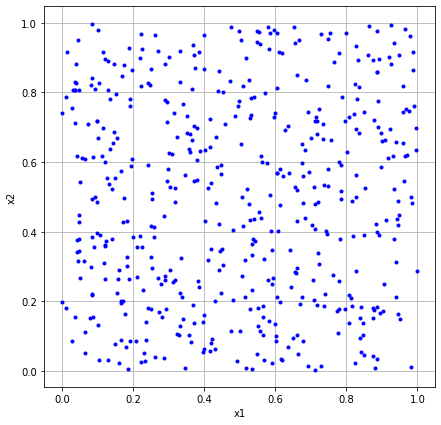

In [7]:
analysis.plot_data(data)

In [8]:
target = analysis.classify_data(data)
print(target[0 : 5])
print(data[0:5])

['type1' 'type1' 'type3' 'type1' 'type3']
[[0.53611486 0.33261872]
 [0.67773492 0.08546784]
 [0.74827761 0.53073078]
 [0.81486819 0.48834371]
 [0.52936037 0.72605929]]


In [9]:
print(len(target[target=='type0']))
print(len(target[target=='type1']))
print(len(target[target=='type2']))
print(len(target[target=='type3']))


126
125
121
128


In [10]:
encoded_target = analysis.encode_data(target)
print(encoded_target[0:10])

[[0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]]


In [21]:
(x_train, x_test) = analysis.get_train_And_test(data, 80)
print(x_train[0 : 4])


(t_train, t_test) = analysis.get_train_And_test(encoded_target, 80)
print(t_train[0 : 4])
print(x_train.shape,t_train.shape)

기준  400
[[0.53611486 0.33261872]
 [0.67773492 0.08546784]
 [0.74827761 0.53073078]
 [0.81486819 0.48834371]]
기준  400
[[0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]]
(400, 2) (400, 4)


In [12]:
(model, hist) = analysis.create_model(x_train, t_train, 100, 16)
#객체 2개 생성 


Epoch 1/100
400/400 [==============================] - 0s 684us/step - loss: 1.3888 - accuracy: 0.3425
Epoch 2/100
400/400 [==============================] - 0s 108us/step - loss: 1.3791 - accuracy: 0.4000
Epoch 3/100
400/400 [==============================] - 0s 99us/step - loss: 1.3752 - accuracy: 0.3900
Epoch 4/100
400/400 [==============================] - 0s 89us/step - loss: 1.3726 - accuracy: 0.3925
Epoch 5/100
400/400 [==============================] - 0s 102us/step - loss: 1.3710 - accuracy: 0.2725
Epoch 6/100
400/400 [==============================] - 0s 125us/step - loss: 1.3685 - accuracy: 0.4600
Epoch 7/100
400/400 [==============================] - 0s 130us/step - loss: 1.3665 - accuracy: 0.4375
Epoch 8/100
400/400 [==============================] - 0s 131us/step - loss: 1.3617 - accuracy: 0.3950
Epoch 9/100
400/400 [==============================] - 0s 140us/step - loss: 1.3593 - accuracy: 0.4075
Epoch 10/100
400/400 [==============================] - 0s 134us/step - los

400/400 [==============================] - 0s 125us/step - loss: 0.4129 - accuracy: 0.9550
Epoch 80/100
400/400 [==============================] - 0s 128us/step - loss: 0.4038 - accuracy: 0.9650
Epoch 81/100
400/400 [==============================] - 0s 122us/step - loss: 0.3957 - accuracy: 0.9625
Epoch 82/100
400/400 [==============================] - 0s 125us/step - loss: 0.3878 - accuracy: 0.9700
Epoch 83/100
400/400 [==============================] - 0s 119us/step - loss: 0.3805 - accuracy: 0.9650
Epoch 84/100
400/400 [==============================] - 0s 120us/step - loss: 0.3726 - accuracy: 0.9650
Epoch 85/100
400/400 [==============================] - 0s 120us/step - loss: 0.3661 - accuracy: 0.9625
Epoch 86/100
400/400 [==============================] - 0s 123us/step - loss: 0.3595 - accuracy: 0.9650
Epoch 87/100
400/400 [==============================] - 0s 123us/step - loss: 0.3523 - accuracy: 0.9650
Epoch 88/100
400/400 [==============================] - 0s 120us/step - loss:

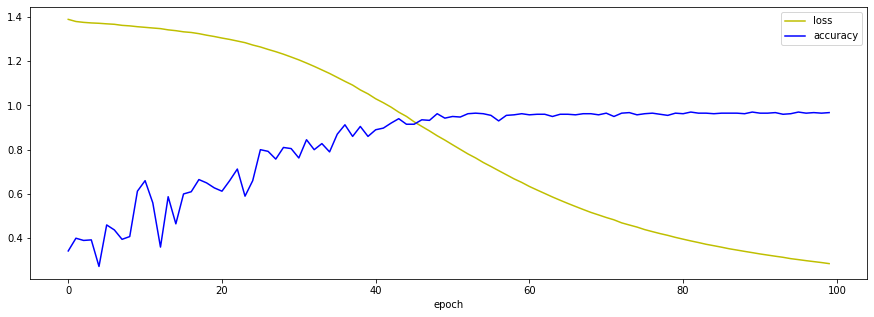

In [13]:
analysis.plot_history(hist)

In [14]:
analysis.evaluate_model(model, x_test, t_test)

100/100 [==============================] - 0s 446us/step


[0.2908663547039032, 0.9399999976158142]

In [15]:
print(x_train.shape)

(400, 2)
